In [59]:
import datetime as dt 
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from pathlib import Path
import ncdump
import pandas as pd
%matplotlib inline
#use get geo code from a301_code

In [60]:
cdf_files = Path().glob("*cdf")
cdf_files = list(cdf_files)
print(cdf_files)
#ncdump(nc_fid)

[PosixPath('nsametC1.b1.20031031.000000.cdf'), PosixPath('nsametC1.b1.20031101.000000.cdf'), PosixPath('nsametC1.b1.20031102.000000.cdf')]


In [61]:
def date_parse(one_date):
    dump, level, good_year, zeros, suffix = one_date.split('.')
    year, month, day=int(good_year[0:4]), int(good_year[4:6]), int(good_year[6:8])
    the_date=datetime.datetime(year=year, month=month, day=day)
    return the_date
    
def create_minute_arr(one_date):
    #create date time array for one day in one minute interals
    base = date_parse(one_date) #datetime.datetime(yyyy, mm, dd)
    date_arr = np.array([base + datetime.timedelta(minutes=i) for i in range(1440)])
    return date_arr

In [73]:
date_list = []
value_list = []
for cdf_file in cdf_files:
    
    cdf_file = str(cdf_file)
    
    nc_f = cdf_file  #filename
    nc_fid = Dataset(nc_f, 'r')  
    precip = nc_fid.variables[key][:]
    
    date_list.append(create_minute_arr(cdf_file))
    value_list.append(precip)
#     df = pd.DataFrame({"precip_rate" : data_arr_to_dict}, 
#                   index=date_arr_to_dict) 

#create Data frame readable arrays
value_arr = np.array(value_list).flatten()
date_arr = np.array(date_list).flatten()


In [85]:
#create data frame
df = pd.DataFrame({"precip_rate" : value_arr}, 
                  index=date_arr) 

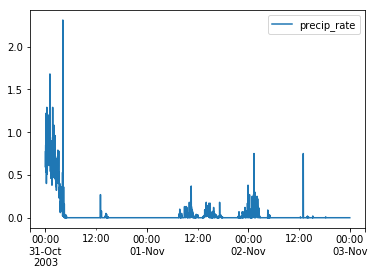

In [86]:
df.plot()